In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
PM_map = pd.read_csv('../data2/a1/PM_map.csv')

PM_map

,รหัสสถานี,ชื่อสถานี,รายละเอียดจุดติดตั้งสถานี,จังหวัด,english_name,adm1__id
0,02T,แขวงหิรัญรูจี เขตธนบุรี กทม.,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,กทม.,Bangkok Metropolis,3.0
1,05T,แขวงบางนา เขตบางนา กทม.,กรมอุตุนิยมวิทยา,กทม.,Bangkok Metropolis,3.0
2,10T,แขวงคลองจั่น เขตบางกะปิ กทม.,เคหะชุมชนคลองจั่น,กทม.,Bangkok Metropolis,3.0
3,11T,แขวงดินแดง เขตดินแดง กทม.,สนามกีฬาเคหะชุมชนห้วยขวาง,กทม.,Bangkok Metropolis,3.0
4,12T,แขวงช่องนนทรี เขตยานนาวา กทม.,โรงเรียนนนทรีวิทยา,กทม.,Bangkok Metropolis,3.0
...,...,...,...,...,...,...
91,63T,ต.สะเตง อ.เมือง จ.ยะลา,สวนสาธารณะสนามโรงพิธีช้างเผือก ยะลา,จ.ยะลา,Yala,76.0
92,78T,ต.เบตง อ.เบตง จ.ยะลา,ศูนย์พัฒนาเด็กเล็กเทศบาลเมืองเบตง,จ.ยะลา,Yala,76.0
93,80T,ต.พิมาน อ.เมือง. จ.สตูล,ศาลากลางจังหวัดสตูล,จ.สตูล,Satun,61.0
94,89T,ต.คลัง อ.เมือง จ.นครศรีธรรมราช,ศูนย์ฟื้นฟูสุขภาพผู้สูงอายุ,จ.นครศรีธรรมราช,Nakhon Si Thammarat,31.0


In [40]:
indicator = pd.read_csv('../data2/a1/indicator.csv')

indicator

,province_name,province_lat,province_lon,English_name,AREA
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,1571.371336
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,19450.911388
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,10612.202446
3,ชลบุรี,13.361143,100.984672,Chon Buri,4504.763605
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,22176.037103
5,ภูเก็ต,7.981050,98.363882,Phuket,548.025456


In [41]:
adm1_list = [3,16,17,12,10,48]
indicator['adm1'] = pd.Series(adm1_list)

indicator

,province_name,province_lat,province_lon,English_name,AREA,adm1
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,1571.371336,3
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,19450.911388,16
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,10612.202446,17
3,ชลบุรี,13.361143,100.984672,Chon Buri,4504.763605,12
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,22176.037103,10
5,ภูเก็ต,7.981050,98.363882,Phuket,548.025456,48


In [42]:
from math import radians, cos, sin, sqrt, asin

def is_within_radius(lat, lon, center_lat, center_lon, radius_km=70):
    # แปลงองศาเป็นเรเดียน
    lat, lon, center_lat, center_lon = map(radians, [lat, lon, center_lat, center_lon])

    # คำนวณระยะทางด้วย haversine formula
    dlon = lon - center_lon
    dlat = lat - center_lat
    a = sin(dlat/2)**2 + cos(center_lat) * cos(lat) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  
    distance = r * c

    # ตรวจสอบระยะทาง
    return distance <= radius_km


In [43]:
fire_achive_raw = pd.read_csv('../data1/FIRM-NASA-fire-alert-data/DL_FIRE_M-C61_591394/fire_archive_M-C61_591394.csv')

fire_achive_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650623 entries, 0 to 650622
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    650623 non-null  float64
 1   longitude   650623 non-null  float64
 2   brightness  650623 non-null  float64
 3   scan        650623 non-null  float64
 4   track       650623 non-null  float64
 5   acq_date    650623 non-null  object 
 6   acq_time    650623 non-null  int64  
 7   satellite   650623 non-null  object 
 8   instrument  650623 non-null  object 
 9   confidence  650623 non-null  int64  
 10  version     650623 non-null  float64
 11  bright_t31  650623 non-null  float64
 12  frp         650623 non-null  float64
 13  daynight    650623 non-null  object 
 14  type        650623 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 74.5+ MB


In [44]:
fire_achive_raw_more = pd.read_csv('../data1/FIRM-NASA-fire-alert-data/DL_FIRE_M-C61_591394/fire_nrt_M-C61_591394.csv')

fire_achive_raw_more['acq_date'] = pd.to_datetime(fire_achive_raw_more['acq_date'], format='%Y-%m-%d')

fire_achive_raw_more['day'] = fire_achive_raw_more['acq_date'].dt.day
fire_achive_raw_more['month'] = fire_achive_raw_more['acq_date'].dt.month
fire_achive_raw_more['year'] = fire_achive_raw_more['acq_date'].dt.year

fire_achive_more = fire_achive_raw_more[(fire_achive_raw_more['year'] == 2024) & (fire_achive_raw_more['month'] == 12)]

fire_achive_more

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,day,month,year
0,14.81086,101.02091,312.45,1.01,1.01,2024-12-01,257,Terra,MODIS,62,6.1NRT,298.95,5.89,D,1,12,2024
1,16.89908,102.93216,312.33,1.02,1.01,2024-12-01,257,Terra,MODIS,64,6.1NRT,297.36,4.89,D,1,12,2024
2,16.99467,100.29537,313.08,1.10,1.04,2024-12-01,257,Terra,MODIS,70,6.1NRT,296.57,6.00,D,1,12,2024
3,16.20995,103.15241,311.86,1.03,1.02,2024-12-01,257,Terra,MODIS,58,6.1NRT,299.51,5.25,D,1,12,2024
4,16.32616,101.98114,309.12,1.00,1.00,2024-12-01,257,Terra,MODIS,58,6.1NRT,297.05,3.96,D,1,12,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,14.54065,100.62626,315.82,1.36,1.16,2024-12-31,314,Terra,MODIS,68,6.1NRT,295.46,16.55,D,31,12,2024
1448,14.21535,99.07667,309.95,1.12,1.06,2024-12-31,314,Terra,MODIS,57,6.1NRT,297.03,5.45,D,31,12,2024
1449,8.57191,99.33247,313.67,1.37,1.16,2024-12-31,317,Terra,MODIS,69,6.1NRT,296.20,12.45,D,31,12,2024
1450,16.24932,104.12816,300.27,2.01,1.38,2024-12-31,1403,Terra,MODIS,23,6.1NRT,282.33,15.24,N,31,12,2024


In [45]:
fire_achive_raw['acq_date'] = pd.to_datetime(fire_achive_raw['acq_date'], format='%Y-%m-%d')

fire_achive_raw['day'] = fire_achive_raw['acq_date'].dt.day
fire_achive_raw['month'] = fire_achive_raw['acq_date'].dt.month
fire_achive_raw['year'] = fire_achive_raw['acq_date'].dt.year

fire_achive = fire_achive_raw[(fire_achive_raw['year'] >= 2014) & (fire_achive_raw['year'] <= 2024)]

fire_achive

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year
392137,14.9725,102.5822,305.6,4.5,2.0,2014-01-01,306,Terra,MODIS,53,6.03,291.7,29.1,D,0,1,1,2014
392138,16.5087,104.5704,312.1,1.4,1.2,2014-01-01,611,Aqua,MODIS,62,6.03,298.6,10.3,D,0,1,1,2014
392139,14.0743,99.8167,310.1,3.6,1.8,2014-01-01,611,Aqua,MODIS,58,6.03,295.7,29.7,D,0,1,1,2014
392140,14.0826,99.8111,308.8,3.6,1.8,2014-01-01,611,Aqua,MODIS,52,6.03,295.8,25.0,D,0,1,1,2014
392141,14.5416,102.2427,313.1,2.3,1.5,2014-01-01,611,Aqua,MODIS,63,6.03,299.6,16.8,D,0,1,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650618,17.6152,101.8280,310.3,1.1,1.1,2024-11-30,716,Aqua,MODIS,58,61.03,298.3,6.2,D,0,30,11,2024
650619,17.8756,104.1100,312.0,1.0,1.0,2024-11-30,716,Aqua,MODIS,63,61.03,299.7,5.7,D,0,30,11,2024
650620,17.0863,100.3943,314.4,1.4,1.2,2024-11-30,716,Aqua,MODIS,68,61.03,299.9,9.7,D,0,30,11,2024
650621,19.6949,100.1696,310.0,1.3,1.1,2024-11-30,717,Aqua,MODIS,19,61.03,291.7,6.5,D,0,30,11,2024


In [46]:
fire_achive = pd.concat([fire_achive, fire_achive_more], ignore_index=True)

fire_achive

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year
0,14.97250,102.58220,305.60,4.50,2.00,2014-01-01,306,Terra,MODIS,53,6.03,291.70,29.10,D,0.0,1,1,2014
1,16.50870,104.57040,312.10,1.40,1.20,2014-01-01,611,Aqua,MODIS,62,6.03,298.60,10.30,D,0.0,1,1,2014
2,14.07430,99.81670,310.10,3.60,1.80,2014-01-01,611,Aqua,MODIS,58,6.03,295.70,29.70,D,0.0,1,1,2014
3,14.08260,99.81110,308.80,3.60,1.80,2014-01-01,611,Aqua,MODIS,52,6.03,295.80,25.00,D,0.0,1,1,2014
4,14.54160,102.24270,313.10,2.30,1.50,2014-01-01,611,Aqua,MODIS,63,6.03,299.60,16.80,D,0.0,1,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259933,14.54065,100.62626,315.82,1.36,1.16,2024-12-31,314,Terra,MODIS,68,6.1NRT,295.46,16.55,D,NaN,31,12,2024
259934,14.21535,99.07667,309.95,1.12,1.06,2024-12-31,314,Terra,MODIS,57,6.1NRT,297.03,5.45,D,NaN,31,12,2024
259935,8.57191,99.33247,313.67,1.37,1.16,2024-12-31,317,Terra,MODIS,69,6.1NRT,296.20,12.45,D,NaN,31,12,2024
259936,16.24932,104.12816,300.27,2.01,1.38,2024-12-31,1403,Terra,MODIS,23,6.1NRT,282.33,15.24,N,NaN,31,12,2024


In [47]:
PM2_5 = pd.read_csv('../data1/pm2-5/combined_pm2.5_2011_2024_daily_microgramperm3.csv')

PM2_5['Date'] = pd.to_datetime(PM2_5['Date'])

PM2_5['Year'] = PM2_5['Date'].dt.year

PM2_5 = PM2_5[(PM2_5['Year'] >= 2014) & (PM2_5['Year'] <= 2024)]

PM2_5

,Date,02T,05T,10T,11T,12T,59T,61T,03T,50T,...,61T,52T,08T,27T,77T,70T*,70T**,72T(เก่า),72T(ใหม่),Year
0,2024-12-31,37.1,33.9,32.9,30.0,30.1,21.9,29.5,32.5,34.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
1,2024-12-30,40.0,28.4,28.2,28.4,28.1,26.2,27.1,34.3,33.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2,2024-12-29,25.8,20.1,20.4,20.6,20.7,17.0,20.1,22.3,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
3,2024-12-28,28.2,22.9,22.5,22.8,23.4,17.0,22.6,25.6,28.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
4,2024-12-27,47.4,35.4,35.8,35.4,35.9,23.2,34.6,43.9,41.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4014,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4015,2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4016,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014


In [48]:
# Extract Fire Achive Chiang Mai data
fire_achive_chiang_mai = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 18.787748, 98.993131),
        axis=1
    )
]

fire_achive_chiang_mai['adm1'] = 10

fire_achive_chiang_mai

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26820\3111070819.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_chiang_mai['adm1'] = 10


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
118,18.31320,99.31980,313.20,1.10,1.00,2014-01-02,654,Aqua,MODIS,64,6.03,299.80,6.40,D,0.0,2,1,2014,10
335,18.65760,98.38050,310.30,1.10,1.10,2014-01-04,642,Aqua,MODIS,63,6.03,298.70,6.50,D,0.0,4,1,2014,10
338,18.69650,98.33580,307.30,1.80,1.30,2014-01-04,1607,Terra,MODIS,71,6.03,286.70,22.90,N,0.0,4,1,2014,10
339,18.69590,98.33610,300.00,1.60,1.30,2014-01-04,1854,Aqua,MODIS,13,6.03,285.20,12.20,N,0.0,4,1,2014,10
341,18.69100,98.33910,316.50,1.20,1.10,2014-01-05,418,Terra,MODIS,75,6.03,295.80,16.20,D,0.0,5,1,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259752,18.96964,98.39062,307.19,1.05,1.02,2024-12-28,748,Aqua,MODIS,50,6.1NRT,294.85,5.90,D,NaN,28,12,2024,10
259814,18.58739,98.64102,305.26,1.29,1.13,2024-12-30,726,Aqua,MODIS,38,6.1NRT,294.00,6.15,D,NaN,30,12,2024,10
259817,19.07896,99.07642,307.59,1.20,1.09,2024-12-30,726,Aqua,MODIS,57,6.1NRT,296.97,6.40,D,NaN,30,12,2024,10
259820,19.23373,98.88801,307.77,1.22,1.10,2024-12-30,726,Aqua,MODIS,57,6.1NRT,295.26,7.17,D,NaN,30,12,2024,10


In [49]:
# Extract PM2.5 Chiang Mai data
PM_chiang_mai_raw = PM_map[PM_map['adm1__id'] == 10]

stations = list(PM_chiang_mai_raw['รหัสสถานี'])
stations.append('Date')

PM_chiang_mai = PM2_5.loc[:,stations]

PM_chiang_mai['adm1'] = 10

PM_chiang_mai

,35T,36T,Date,adm1
0,26.6,21.5,2024-12-31,10
1,27.3,23.1,2024-12-30,10
2,24.2,20.1,2024-12-29,10
3,22.8,17.4,2024-12-28,10
4,27.3,23.6,2024-12-27,10
...,...,...,...,...
4013,NaN,47.0,2014-01-05,10
4014,NaN,42.0,2014-01-04,10
4015,NaN,45.0,2014-01-03,10
4016,NaN,39.0,2014-01-02,10


In [50]:
# Merge Chon Buri Dataframe
chiang_mai_df = pd.merge(
    fire_achive_chiang_mai,
    PM_chiang_mai,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

chiang_mai_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,frp,daynight,type,day,month,year,adm1,35T,36T,Date
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,26.6,21.5,2024-12-31
1,18.58739,98.64102,305.26,1.29,1.13,2024-12-30,726.0,Aqua,MODIS,38.0,...,6.15,D,NaN,30.0,12.0,2024.0,10,27.3,23.1,2024-12-30
2,19.07896,99.07642,307.59,1.20,1.09,2024-12-30,726.0,Aqua,MODIS,57.0,...,6.40,D,NaN,30.0,12.0,2024.0,10,27.3,23.1,2024-12-30
3,19.23373,98.88801,307.77,1.22,1.10,2024-12-30,726.0,Aqua,MODIS,57.0,...,7.17,D,NaN,30.0,12.0,2024.0,10,27.3,23.1,2024-12-30
4,18.93043,98.36158,318.66,1.32,1.14,2024-12-30,1505.0,Terra,MODIS,97.0,...,26.71,N,NaN,30.0,12.0,2024.0,10,27.3,23.1,2024-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12236,18.69650,98.33580,307.30,1.80,1.30,2014-01-04,1607.0,Terra,MODIS,71.0,...,22.90,N,0.0,4.0,1.0,2014.0,10,NaN,42.0,2014-01-04
12237,18.69590,98.33610,300.00,1.60,1.30,2014-01-04,1854.0,Aqua,MODIS,13.0,...,12.20,N,0.0,4.0,1.0,2014.0,10,NaN,42.0,2014-01-04
12238,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,45.0,2014-01-03
12239,18.31320,99.31980,313.20,1.10,1.00,2014-01-02,654.0,Aqua,MODIS,64.0,...,6.40,D,0.0,2.0,1.0,2014.0,10,NaN,39.0,2014-01-02


In [51]:
# Extract Fire Achive Bangkok data
fire_achive_bangkok = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 13.727896, 100.524123),
        axis=1
    )
]

fire_achive_bangkok['adm1'] = 3

fire_achive_bangkok

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26820\2152698000.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_bangkok['adm1'] = 3


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
95,13.73220,100.77870,314.20,1.10,1.10,2014-01-02,653,Aqua,MODIS,34,6.03,301.30,4.50,D,2.0,2,1,2014,3
97,13.92620,100.85670,312.30,1.20,1.10,2014-01-02,653,Aqua,MODIS,38,6.03,301.40,5.80,D,0.0,2,1,2014,3
275,14.20000,100.93330,319.40,1.00,1.00,2014-01-04,641,Aqua,MODIS,70,6.03,304.40,8.90,D,0.0,4,1,2014,3
286,13.61560,99.97700,312.10,1.10,1.00,2014-01-04,641,Aqua,MODIS,47,6.03,301.70,4.90,D,0.0,4,1,2014,3
292,14.09910,100.80720,312.60,1.00,1.00,2014-01-04,641,Aqua,MODIS,48,6.03,302.20,4.50,D,0.0,4,1,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259829,13.84498,101.09032,315.40,1.10,1.05,2024-12-30,726,Aqua,MODIS,58,6.1NRT,301.19,8.79,D,NaN,30,12,2024,3
259832,14.07165,100.64128,318.14,1.15,1.07,2024-12-30,726,Aqua,MODIS,45,6.1NRT,300.67,6.61,D,NaN,30,12,2024,3
259833,14.08101,100.63972,320.77,1.15,1.07,2024-12-30,726,Aqua,MODIS,71,6.1NRT,302.32,9.87,D,NaN,30,12,2024,3
259834,14.12412,100.68935,316.27,1.14,1.06,2024-12-30,726,Aqua,MODIS,65,6.1NRT,302.56,8.09,D,NaN,30,12,2024,3


In [52]:
# Extract PM2.5 Bangkok data
PM_bangkok_raw = PM_map[PM_map['adm1__id'] == 3]

stations = list(PM_bangkok_raw['รหัสสถานี'])
stations.append('Date')

PM_bangkok = PM2_5.loc[:,stations]

PM_bangkok['adm1'] = 3

PM_bangkok

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T,Date,adm1
0,37.1,33.9,32.9,30.0,30.1,21.9,29.5,32.5,34.1,36.9,34.1,34.9,2024-12-31,3
1,40.0,28.4,28.2,28.4,28.1,26.2,27.1,34.3,33.2,39.2,32.7,33.4,2024-12-30,3
2,25.8,20.1,20.4,20.6,20.7,17.0,20.1,22.3,23.8,25.2,23.6,23.3,2024-12-29,3
3,28.2,22.9,22.5,22.8,23.4,17.0,22.6,25.6,28.2,27.8,27.9,27.7,2024-12-28,3
4,47.4,35.4,35.8,35.4,35.9,23.2,34.6,43.9,41.6,46.2,40.0,44.5,2024-12-27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05,3
4014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-04,3
4015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-03,3
4016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-02,3


In [53]:
# Extract Weather Bangkok Data
bangkok_weather = pd.read_csv('../data1/weather/bangkok_weather.csv')

bangkok_weather['date'] = pd.to_datetime(bangkok_weather['date'])
bangkok_weather['Year'] = bangkok_weather['date'].dt.year

bangkok_weather = bangkok_weather[(bangkok_weather['Year'] >= 2014) & (bangkok_weather['Year'] <= 2024)]

bangkok_weather

,date,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation,Year
115,2024-12-01,88.0,80.5,73.0,66.0,63.7,61.0,73.0,57.6,40.0,9.0,6.0,3.0,29.9,29.8,29.7,0.0,2024
116,2024-12-02,91.0,82.3,73.0,68.0,65.8,63.0,78.0,58.9,38.0,9.0,5.4,2.0,29.9,29.8,29.7,0.0,2024
117,2024-12-03,91.0,84.3,77.0,70.0,68.3,66.0,78.0,59.8,43.0,8.0,5.5,3.0,29.9,29.8,29.7,0.0,2024
118,2024-12-04,91.0,84.8,77.0,73.0,69.3,66.0,89.0,61.1,46.0,15.0,6.4,1.0,29.9,29.8,29.7,0.0,2024
119,2024-12-05,90.0,84.1,77.0,72.0,69.2,66.0,78.0,61.8,46.0,10.0,4.8,0.0,29.9,29.8,29.7,0.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,2014-01-27,88.0,78.2,66.0,68.0,63.5,59.0,100.0,63.2,38.0,10.0,3.6,0.0,30.0,29.9,29.8,0.0,2014
4129,2014-01-28,90.0,79.8,68.0,64.0,60.8,52.0,78.0,54.8,29.0,12.0,4.1,0.0,30.0,29.9,29.8,0.0,2014
4130,2014-01-29,90.0,80.5,70.0,72.0,64.0,57.0,94.0,60.3,33.0,10.0,2.8,0.0,30.0,29.9,29.8,0.0,2014
4131,2014-01-30,90.0,80.3,70.0,68.0,62.5,57.0,94.0,57.1,33.0,12.0,4.5,0.0,30.0,29.9,29.8,0.0,2014


In [54]:
# Merge Bangkok Dataframe
bangkok_df = pd.merge(
    fire_achive_bangkok,
    PM_bangkok,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

bangkok_df = pd.merge(
    bangkok_df,
    bangkok_weather,
    left_on='Date',
    right_on='date',
    how='left'
)

bangkok_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation,Year
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,53.0,35.0,10.0,5.1,1.0,30.0,29.9,29.8,0.0,2024
1,13.30004,100.99583,312.93,1.96,1.37,2024-12-30,234.0,Terra,MODIS,52.0,...,54.4,35.0,10.0,5.2,0.0,30.0,29.9,29.8,0.0,2024
2,13.84498,101.09032,315.40,1.10,1.05,2024-12-30,726.0,Aqua,MODIS,58.0,...,54.4,35.0,10.0,5.2,0.0,30.0,29.9,29.8,0.0,2024
3,14.07165,100.64128,318.14,1.15,1.07,2024-12-30,726.0,Aqua,MODIS,45.0,...,54.4,35.0,10.0,5.2,0.0,30.0,29.9,29.8,0.0,2024
4,14.08101,100.63972,320.77,1.15,1.07,2024-12-30,726.0,Aqua,MODIS,71.0,...,54.4,35.0,10.0,5.2,0.0,30.0,29.9,29.8,0.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7823,14.15790,100.95870,320.00,1.00,1.00,2014-01-04,641.0,Aqua,MODIS,71.0,...,62.5,36.0,9.0,2.9,0.0,29.9,29.9,29.8,0.0,2014
7824,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,61.4,31.0,8.0,2.5,0.0,30.0,29.9,29.8,0.0,2014
7825,13.73220,100.77870,314.20,1.10,1.10,2014-01-02,653.0,Aqua,MODIS,34.0,...,63.0,38.0,8.0,3.1,0.0,30.0,29.9,29.8,0.0,2014
7826,13.92620,100.85670,312.30,1.20,1.10,2014-01-02,653.0,Aqua,MODIS,38.0,...,63.0,38.0,8.0,3.1,0.0,30.0,29.9,29.8,0.0,2014


In [55]:
# Extract Fire Achive Khon Kaen data
fire_achive_khon_kaen = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 16.441935, 102.835992),
        axis=1
    )
]

fire_achive_khon_kaen['adm1'] = 17
fire_achive_khon_kaen

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26820\1095050823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_khon_kaen['adm1'] = 17


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
17,16.38430,103.14560,315.70,1.80,1.30,2014-01-01,611,Aqua,MODIS,67,6.03,299.80,17.70,D,0.0,1,1,2014,17
19,16.72310,103.36770,313.00,1.70,1.30,2014-01-01,611,Aqua,MODIS,64,6.03,298.90,10.70,D,0.0,1,1,2014,17
29,16.90410,102.80700,311.90,1.00,1.00,2014-01-02,348,Terra,MODIS,56,6.03,298.40,4.10,D,0.0,2,1,2014,17
30,16.84290,102.78200,314.50,1.00,1.00,2014-01-02,348,Terra,MODIS,66,6.03,299.80,6.30,D,0.0,2,1,2014,17
33,16.59100,103.05220,316.20,1.00,1.00,2014-01-02,348,Terra,MODIS,68,6.03,299.60,8.10,D,0.0,2,1,2014,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259898,16.58174,103.17198,316.39,1.02,1.01,2024-12-30,726,Aqua,MODIS,61,6.1NRT,305.17,5.19,D,NaN,30,12,2024,17
259900,16.62088,102.86817,335.56,1.01,1.00,2024-12-30,726,Aqua,MODIS,87,6.1NRT,306.26,26.52,D,NaN,30,12,2024,17
259901,16.61956,102.85899,320.11,1.01,1.00,2024-12-30,726,Aqua,MODIS,66,6.1NRT,304.59,8.05,D,NaN,30,12,2024,17
259915,16.27560,102.27668,310.14,1.66,1.27,2024-12-31,314,Terra,MODIS,61,6.1NRT,296.18,9.99,D,NaN,31,12,2024,17


In [56]:
# Extract PM2.5 Khon Kaen data
PM_khon_kaen_raw = PM_map[PM_map['adm1__id'] == 17]

stations = list(PM_khon_kaen_raw['รหัสสถานี'])
stations.append('Date')

PM_khon_kaen = PM2_5.loc[:,stations]

PM_khon_kaen['adm1'] = 17

PM_khon_kaen

,46T,Date,adm1
0,30.0,2024-12-31,17
1,35.2,2024-12-30,17
2,NaN,2024-12-29,17
3,24.5,2024-12-28,17
4,24.5,2024-12-27,17
...,...,...,...
4013,81.0,2014-01-05,17
4014,64.0,2014-01-04,17
4015,108.0,2014-01-03,17
4016,92.0,2014-01-02,17


In [57]:
# Merge Khon Kaen Dataframe
khon_kaen_df = pd.merge(
    fire_achive_khon_kaen,
    PM_khon_kaen,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

khon_kaen_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,bright_t31,frp,daynight,type,day,month,year,adm1,46T,Date
0,16.27560,102.27668,310.14,1.66,1.27,2024-12-31,314.0,Terra,MODIS,61.0,...,296.18,9.99,D,NaN,31.0,12.0,2024.0,17,30.0,2024-12-31
1,16.27310,102.29164,322.72,1.66,1.27,2024-12-31,314.0,Terra,MODIS,79.0,...,297.16,32.97,D,NaN,31.0,12.0,2024.0,17,30.0,2024-12-31
2,16.81434,103.18429,327.99,1.02,1.01,2024-12-30,726.0,Aqua,MODIS,80.0,...,302.44,19.89,D,NaN,30.0,12.0,2024.0,17,35.2,2024-12-30
3,16.35977,102.97393,320.60,1.01,1.00,2024-12-30,726.0,Aqua,MODIS,51.0,...,305.53,8.33,D,NaN,30.0,12.0,2024.0,17,35.2,2024-12-30
4,16.39085,102.99154,322.25,1.01,1.00,2024-12-30,726.0,Aqua,MODIS,64.0,...,307.42,10.24,D,NaN,30.0,12.0,2024.0,17,35.2,2024-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906,16.26860,102.31470,315.60,1.50,1.20,2014-01-02,654.0,Aqua,MODIS,60.0,...,302.80,9.30,D,0.0,2.0,1.0,2014.0,17,92.0,2014-01-02
10907,16.44260,102.73150,315.80,1.60,1.30,2014-01-02,654.0,Aqua,MODIS,63.0,...,301.60,10.90,D,0.0,2.0,1.0,2014.0,17,92.0,2014-01-02
10908,16.50280,102.94330,316.90,1.70,1.30,2014-01-02,654.0,Aqua,MODIS,63.0,...,302.50,11.70,D,0.0,2.0,1.0,2014.0,17,92.0,2014-01-02
10909,16.38430,103.14560,315.70,1.80,1.30,2014-01-01,611.0,Aqua,MODIS,67.0,...,299.80,17.70,D,0.0,1.0,1.0,2014.0,17,83.0,2014-01-01


In [58]:
# Extract Fire Achive Chon Buri data
fire_achive_chon_buri	 = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 13.361143 , 100.984672),
        axis=1
    )
]

fire_achive_chon_buri['adm1'] = 12

fire_achive_chon_buri

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26820\3959898565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_chon_buri['adm1'] = 12


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
92,13.03450,101.05510,331.00,1.20,1.10,2014-01-02,653,Aqua,MODIS,82,6.03,304.30,24.70,D,0.0,2,1,2014,12
93,13.04230,100.96860,326.80,1.10,1.10,2014-01-02,653,Aqua,MODIS,78,6.03,303.10,18.80,D,0.0,2,1,2014,12
94,13.04090,100.95810,326.00,1.10,1.10,2014-01-02,653,Aqua,MODIS,77,6.03,303.00,17.80,D,0.0,2,1,2014,12
95,13.73220,100.77870,314.20,1.10,1.10,2014-01-02,653,Aqua,MODIS,34,6.03,301.30,4.50,D,2.0,2,1,2014,12
97,13.92620,100.85670,312.30,1.20,1.10,2014-01-02,653,Aqua,MODIS,38,6.03,301.40,5.80,D,0.0,2,1,2014,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259800,12.91109,101.15107,321.45,1.12,1.05,2024-12-30,724,Aqua,MODIS,73,6.1NRT,304.15,11.02,D,NaN,30,12,2024,12
259829,13.84498,101.09032,315.40,1.10,1.05,2024-12-30,726,Aqua,MODIS,58,6.1NRT,301.19,8.79,D,NaN,30,12,2024,12
259903,13.55629,100.67831,306.05,1.60,1.25,2024-12-30,1503,Terra,MODIS,67,6.1NRT,293.81,11.65,N,NaN,30,12,2024,12
259905,13.17066,101.08974,304.28,1.70,1.28,2024-12-30,1503,Terra,MODIS,59,6.1NRT,293.06,11.64,N,NaN,30,12,2024,12


In [59]:
# Extract PM2.5 Chon Buri data
PM_chon_buri_raw = PM_map[PM_map['adm1__id'] == 12]

stations = list(PM_chon_buri_raw['รหัสสถานี'])
stations.append('Date')

PM_chon_buri = PM2_5.loc[:,stations]

PM_chon_buri['adm1'] = 12

PM_chon_buri

,32T,33T,34T,Date,adm1
0,20.7,23.9,22.3,2024-12-31,12
1,19.6,23.4,23.0,2024-12-30,12
2,16.8,17.5,15.4,2024-12-29,12
3,15.7,19.0,17.8,2024-12-28,12
4,27.6,25.9,20.7,2024-12-27,12
...,...,...,...,...,...
4013,NaN,NaN,NaN,2014-01-05,12
4014,NaN,NaN,NaN,2014-01-04,12
4015,NaN,NaN,NaN,2014-01-03,12
4016,NaN,NaN,NaN,2014-01-02,12


In [60]:
# Merge Chon Buri Dataframe
chon_buri_df = pd.merge(
    fire_achive_chon_buri,
    PM_chon_buri,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

chon_buri_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,daynight,type,day,month,year,adm1,32T,33T,34T,Date
0,13.17759,101.06812,311.10,1.54,1.22,2024-12-31,314.0,Terra,MODIS,61.0,...,D,NaN,31.0,12.0,2024.0,12,20.7,23.9,22.3,2024-12-31
1,13.30004,100.99583,312.93,1.96,1.37,2024-12-30,234.0,Terra,MODIS,52.0,...,D,NaN,30.0,12.0,2024.0,12,19.6,23.4,23.0,2024-12-30
2,13.29279,101.00246,315.31,1.96,1.37,2024-12-30,234.0,Terra,MODIS,64.0,...,D,NaN,30.0,12.0,2024.0,12,19.6,23.4,23.0,2024-12-30
3,13.22159,101.12383,318.29,1.11,1.05,2024-12-30,724.0,Aqua,MODIS,62.0,...,D,NaN,30.0,12.0,2024.0,12,19.6,23.4,23.0,2024-12-30
4,13.17225,101.04968,315.83,1.12,1.06,2024-12-30,724.0,Aqua,MODIS,54.0,...,D,NaN,30.0,12.0,2024.0,12,19.6,23.4,23.0,2024-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,13.04230,100.96860,326.80,1.10,1.10,2014-01-02,653.0,Aqua,MODIS,78.0,...,D,0.0,2.0,1.0,2014.0,12,NaN,NaN,NaN,2014-01-02
6874,13.04090,100.95810,326.00,1.10,1.10,2014-01-02,653.0,Aqua,MODIS,77.0,...,D,0.0,2.0,1.0,2014.0,12,NaN,NaN,NaN,2014-01-02
6875,13.73220,100.77870,314.20,1.10,1.10,2014-01-02,653.0,Aqua,MODIS,34.0,...,D,2.0,2.0,1.0,2014.0,12,NaN,NaN,NaN,2014-01-02
6876,13.92620,100.85670,312.30,1.20,1.10,2014-01-02,653.0,Aqua,MODIS,38.0,...,D,0.0,2.0,1.0,2014.0,12,NaN,NaN,NaN,2014-01-02


In [61]:
# Extract Fire Achive Phuket data
fire_achive_phuket	 = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 7.981050 , 98.363882),
        axis=1
    )
]

fire_achive_phuket['adm1'] = 48

fire_achive_phuket

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26820\1562800541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_phuket['adm1'] = 48


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
89,8.4187,98.3362,314.6,1.0,1.0,2014-01-02,652,Aqua,MODIS,48,6.03,297.8,6.8,D,0.0,2,1,2014,48
518,7.9602,98.5992,312.6,1.2,1.1,2014-01-07,409,Terra,MODIS,50,6.03,294.3,7.6,D,0.0,7,1,2014,48
1645,8.5787,98.3363,317.1,1.2,1.1,2014-01-18,350,Terra,MODIS,70,6.03,300.5,11.8,D,0.0,18,1,2014,48
3509,8.2663,98.7495,316.1,1.4,1.2,2014-01-30,415,Terra,MODIS,61,6.03,298.7,15.1,D,0.0,30,1,2014,48
6800,8.2004,98.9011,310.3,1.0,1.0,2014-02-16,1546,Terra,MODIS,80,6.03,294.9,7.9,N,0.0,16,2,2014,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254188,8.2197,98.3646,321.1,1.7,1.3,2024-04-18,708,Aqua,MODIS,67,61.03,301.1,21.7,D,0.0,18,4,2024,48
254189,8.2172,98.3495,321.0,1.7,1.3,2024-04-18,708,Aqua,MODIS,58,61.03,302.3,20.9,D,0.0,18,4,2024,48
257377,8.0075,98.3110,316.3,1.1,1.0,2024-06-06,324,Terra,MODIS,59,61.03,296.8,5.8,D,0.0,6,6,2024,48
257417,8.0700,98.8554,303.8,1.4,1.2,2024-06-13,1953,Aqua,MODIS,55,61.03,291.9,5.9,N,0.0,13,6,2024,48


In [62]:
# Extract PM2.5 Khon Kaen data
PM_phuket_raw = PM_map[PM_map['adm1__id'] == 48]

stations = list(PM_phuket_raw['รหัสสถานี'])
stations.append('Date')

PM_phuket = PM2_5.loc[:,stations]

PM_phuket['adm1'] = 48

PM_phuket

,43T,Date,adm1
0,15.6,2024-12-31,48
1,13.7,2024-12-30,48
2,10.1,2024-12-29,48
3,9.8,2024-12-28,48
4,12.4,2024-12-27,48
...,...,...,...
4013,NaN,2014-01-05,48
4014,NaN,2014-01-04,48
4015,NaN,2014-01-03,48
4016,NaN,2014-01-02,48


In [63]:
# Merge Phuket Dataframe
phuket_df = pd.merge(
    fire_achive_phuket,
    PM_phuket,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

phuket_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,bright_t31,frp,daynight,type,day,month,year,adm1,43T,Date
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,15.6,2024-12-31
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,13.7,2024-12-30
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,10.1,2024-12-29
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,9.8,2024-12-28
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,12.4,2024-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,2014-01-05
4054,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,2014-01-04
4055,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,2014-01-03
4056,8.4187,98.3362,314.6,1.0,1.0,2014-01-02,652.0,Aqua,MODIS,48.0,...,297.8,6.8,D,0.0,2.0,1.0,2014.0,48,NaN,2014-01-02


In [64]:
# Extract Fire Achive Phuket data
fire_achive_kanchanaburi = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 14.022780 , 99.532811),
        axis=1
    )
]

fire_achive_kanchanaburi['adm1'] = 16

fire_achive_kanchanaburi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26820\3836815329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_kanchanaburi['adm1'] = 16


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
2,14.07430,99.81670,310.10,3.60,1.80,2014-01-01,611,Aqua,MODIS,58,6.03,295.70,29.70,D,0.0,1,1,2014,16
3,14.08260,99.81110,308.80,3.60,1.80,2014-01-01,611,Aqua,MODIS,52,6.03,295.80,25.00,D,0.0,1,1,2014,16
6,14.55620,99.44160,313.60,3.80,1.80,2014-01-01,611,Aqua,MODIS,65,6.03,295.20,49.70,D,0.0,1,1,2014,16
7,14.56300,99.43610,310.70,3.80,1.80,2014-01-01,611,Aqua,MODIS,50,6.03,295.50,34.90,D,0.0,1,1,2014,16
10,14.64130,99.44890,312.40,3.80,1.80,2014-01-01,611,Aqua,MODIS,62,6.03,295.50,45.00,D,0.0,1,1,2014,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259831,13.67484,99.80245,319.20,1.29,1.13,2024-12-30,726,Aqua,MODIS,53,6.1NRT,301.17,13.11,D,NaN,30,12,2024,16
259835,14.09460,99.85986,315.58,1.26,1.12,2024-12-30,726,Aqua,MODIS,65,6.1NRT,300.68,10.11,D,NaN,30,12,2024,16
259837,14.08428,99.73215,317.74,1.29,1.13,2024-12-30,726,Aqua,MODIS,68,6.1NRT,300.47,10.39,D,NaN,30,12,2024,16
259920,13.61320,99.38885,309.42,1.18,1.08,2024-12-31,314,Terra,MODIS,61,6.1NRT,297.14,5.37,D,NaN,31,12,2024,16


In [65]:
# Extract PM2.5 Khon Kaen data
PM_kanchanaburi_raw = PM_map[PM_map['adm1__id'] == 16]

stations = list(PM_kanchanaburi_raw['รหัสสถานี'])
stations.append('Date')

PM_kanchanaburi = PM2_5.loc[:,stations]

PM_kanchanaburi['adm1'] = 16

PM_kanchanaburi

,79T,Date,adm1
0,34.4,2024-12-31,16
1,24.7,2024-12-30,16
2,24.4,2024-12-29,16
3,28.6,2024-12-28,16
4,NaN,2024-12-27,16
...,...,...,...
4013,NaN,2014-01-05,16
4014,NaN,2014-01-04,16
4015,NaN,2014-01-03,16
4016,NaN,2014-01-02,16


In [66]:
# Merge Phuket Dataframe
kanchanaburi_df = pd.merge(
    fire_achive_kanchanaburi,
    PM_kanchanaburi,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

kanchanaburi_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,bright_t31,frp,daynight,type,day,month,year,adm1,79T,Date
0,13.61320,99.38885,309.42,1.18,1.08,2024-12-31,314.0,Terra,MODIS,61.0,...,297.14,5.37,D,NaN,31.0,12.0,2024.0,16,34.4,2024-12-31
1,14.21535,99.07667,309.95,1.12,1.06,2024-12-31,314.0,Terra,MODIS,57.0,...,297.03,5.45,D,NaN,31.0,12.0,2024.0,16,34.4,2024-12-31
2,13.67484,99.80245,319.20,1.29,1.13,2024-12-30,726.0,Aqua,MODIS,53.0,...,301.17,13.11,D,NaN,30.0,12.0,2024.0,16,24.7,2024-12-30
3,14.09460,99.85986,315.58,1.26,1.12,2024-12-30,726.0,Aqua,MODIS,65.0,...,300.68,10.11,D,NaN,30.0,12.0,2024.0,16,24.7,2024-12-30
4,14.08428,99.73215,317.74,1.29,1.13,2024-12-30,726.0,Aqua,MODIS,68.0,...,300.47,10.39,D,NaN,30.0,12.0,2024.0,16,24.7,2024-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,14.55620,99.44160,313.60,3.80,1.80,2014-01-01,611.0,Aqua,MODIS,65.0,...,295.20,49.70,D,0.0,1.0,1.0,2014.0,16,NaN,2014-01-01
10221,14.56300,99.43610,310.70,3.80,1.80,2014-01-01,611.0,Aqua,MODIS,50.0,...,295.50,34.90,D,0.0,1.0,1.0,2014.0,16,NaN,2014-01-01
10222,14.64130,99.44890,312.40,3.80,1.80,2014-01-01,611.0,Aqua,MODIS,62.0,...,295.50,45.00,D,0.0,1.0,1.0,2014.0,16,NaN,2014-01-01
10223,13.77970,99.51060,305.70,1.10,1.10,2014-01-01,1535.0,Terra,MODIS,65.0,...,288.60,9.50,N,0.0,1.0,1.0,2014.0,16,NaN,2014-01-01


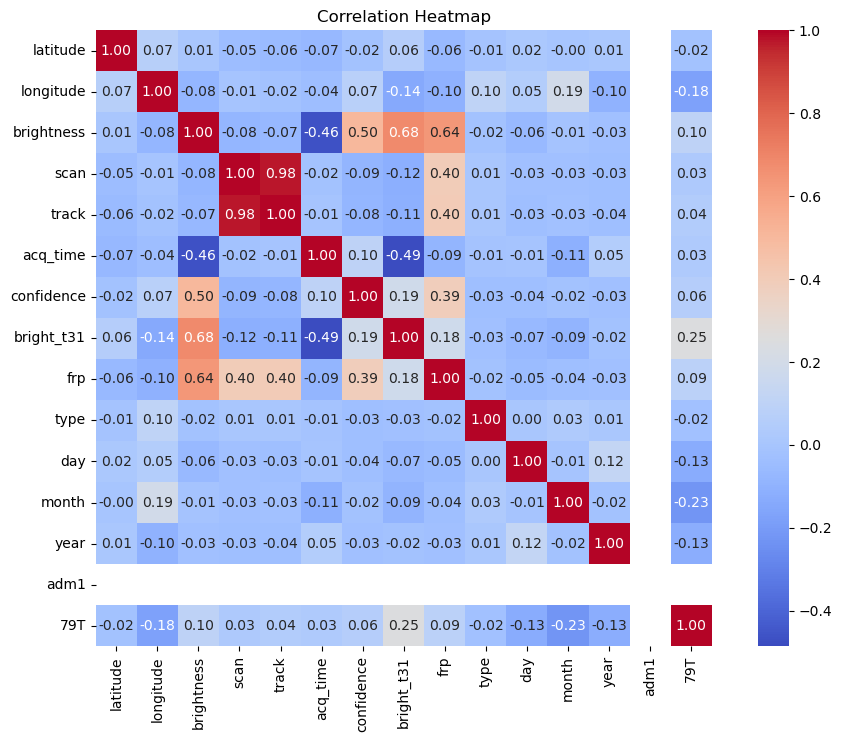

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง correlation matrix
corr = kanchanaburi_df.corr(numeric_only=True)  # เฉพาะ columns ที่เป็นตัวเลข

# วาด heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)

# ตั้งชื่อกราฟ
plt.title('Correlation Heatmap')
plt.show()
